In [2]:
import json
import string
import pandas as pd
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import joblib
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/aryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# loading data
sentences = []
with open('Electronics_5.json') as f:
    for jsonObj in f:
        sent = json.loads(jsonObj)
        sentences.append(sent['reviewText'])

In [ ]:
# storing frequency of each token. Will remove the tokens whose frequency is less than a partcular threshold like 5
frequency = {}
num_of_training_sentences = 50000
lst = []

stop_words = set(stopwords.words('english'))

# filtering the top num_of_training sentences
for i in range(num_of_training_sentences):
    sent = sentences[i].lower()
    pure = ''
    for ch in sent:
        if ch not in string.punctuation:
            pure += ch
        else:
            pure += ' '
    lst.append(pure)
    
pure_sentences = []
for i in range(num_of_training_sentences):
    sent = lst[i]
    pure = ''
    for w in sent.split():
        if w.isalpha() and w not in stop_words:
            pure += w
            pure += ' '
    pure_sentences.append(pure)

# storing counts for co-occurence matrix
count = {}
for i in range(num_of_training_sentences):
    tokens = pure_sentences[i].split()
    length = len(tokens)
    for j in range(length):
        if frequency.get(tokens[j]) == None:
            frequency[tokens[j]] = 0
        frequency[tokens[j]] += 1

        if j-1 >= 0:
            if count.get((tokens[j],tokens[j-1])) == None:
                count[(tokens[j],tokens[j-1])] = 0
            count[(tokens[j],tokens[j-1])] += 1

        if j+1 < length:
            if count.get((tokens[j],tokens[j+1])) == None:
                count[(tokens[j],tokens[j+1])] = 0
            count[(tokens[j],tokens[j+1])] += 1

In [ ]:
# building co-occurence matrix for only those words whose frequency is greater than a particular value
threshold = 5
words = []
for w in frequency.keys():
    if frequency[w] >= threshold:
        words.append(w)

# sparse matrix representation -> instead of csr matrix because lil matrix is more efficient
tot_words = len(words)
lil = lil_matrix((tot_words,tot_words), dtype=bool)

for i in range(tot_words):
    for j in range(tot_words):
        if count.get((words[i],words[j])) != None:
            lil[i,j] = count[(words[i],words[j])]

In [ ]:
# SVD 
svd = TruncatedSVD(n_components=2000, n_iter=5, random_state=42)
mat = svd.fit_transform(lil)

In [ ]:
dump = {}
for i in range(tot_words):
    dump[words[i]] = mat[i]

joblib.dump(dump, 'q1.pkl')

In [10]:
model = joblib.load('q1.pkl')

def top_10(word):
    global model
    target_vec = model[word]

    lst = []
    for key,value in model.items():
        lst.append([cosine_similarity([target_vec] , [value]),key])

    lst.sort(reverse=True)
    # output 10 closest words
    print('Top 10 closest word for the word {} are:'.format(word))
    vecs = []
    vals = []
    close_words = []
    for i in range(10):
        vecs.append(model[lst[i][1]])
        vals.append(lst[i][1])
        close_words.append(lst[i][1])
    print(close_words)
        
    df = pd.DataFrame(vecs)
    pca = PCA(n_components = 2)
    vecs = pca.fit_transform(vecs)
    
    plt.figure(figsize=(10,10))
    plt.scatter(vecs[:,0], vecs[:,1])
    for word, (x,y) in zip(vals, vecs):
        plt.text(x, y, word)
    plt.show()

Top 10 closest word for the word camera are:
['camera', 'lens', 'one', 'also', 'quality', 'use', 'computer', 'product', 'great', 'only']


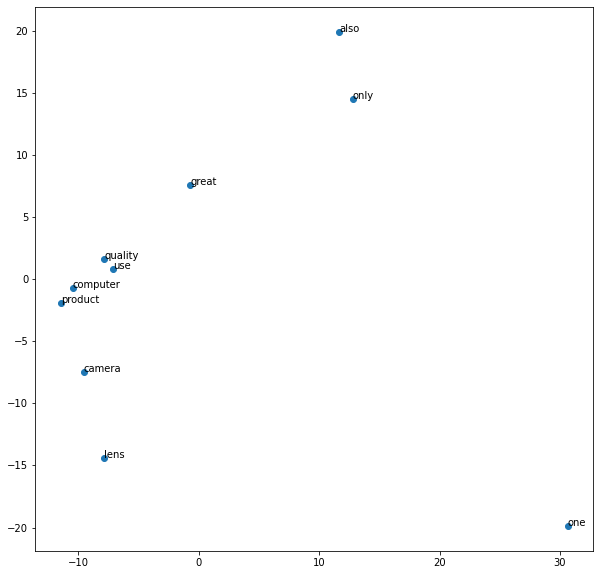

In [12]:
top_10('camera')

Top 10 closest word for the word android are:
['android', 'tablet', 'laptops', 'macs', 'gadgets', 'itunes', 'nook', 'july', 'ways', 'os']


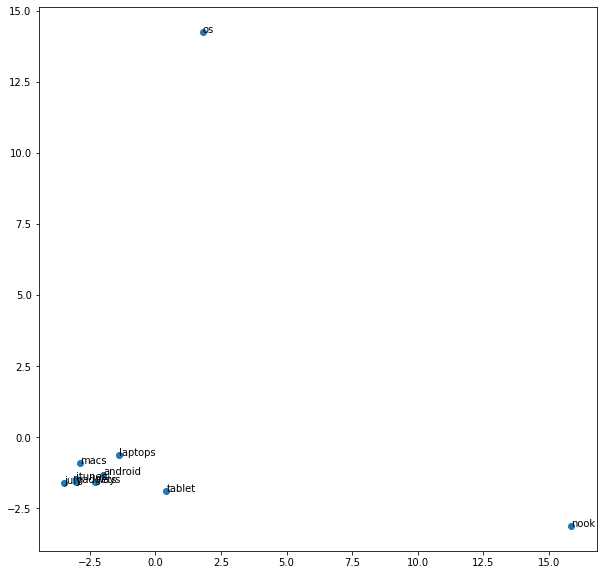

In [13]:
# nouns
top_10('android')

Top 10 closest word for the word play are:
['play', 'playing', 'read', 'record', 'run', 'hold', 'played', 'playback', 'hear', 'player']


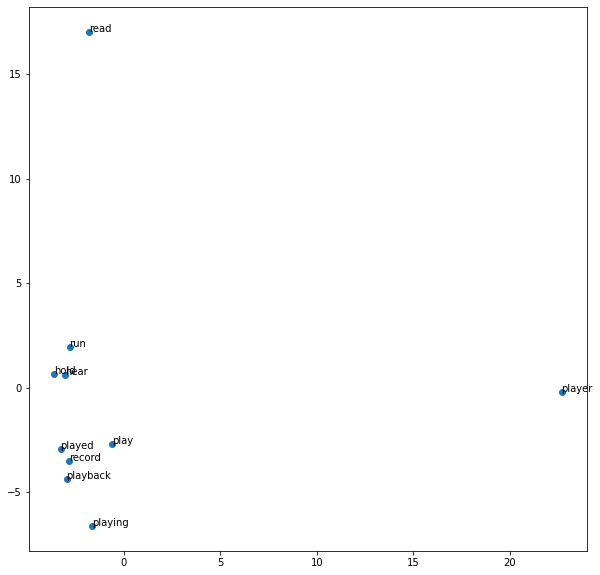

In [14]:
# verb
top_10('play')

Top 10 closest word for the word happy are:
['happy', 'satisfied', 'impressed', 'pleased', 'disappointed', 'surprised', 'tell', 'expected', 'uncomfortable', 'helpful']


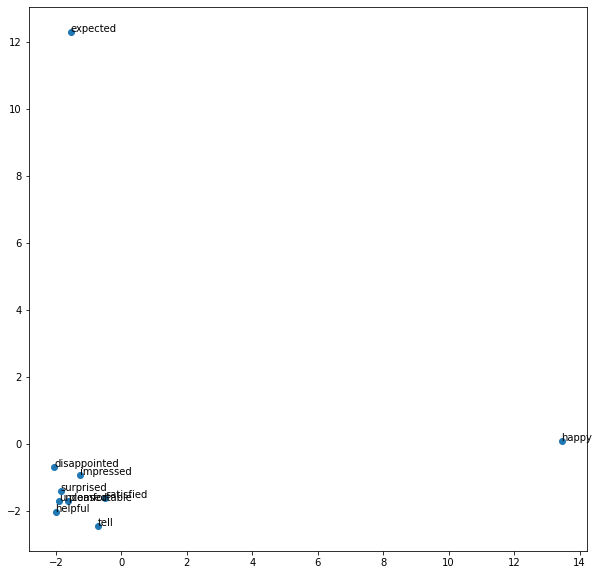

In [15]:
# adjective
top_10('happy')

Top 10 closest word for the word quick are:
['quick', 'fast', 'quickly', 'easy', 'simple', 'time', 'slow', 'fine', 'great', 'good']


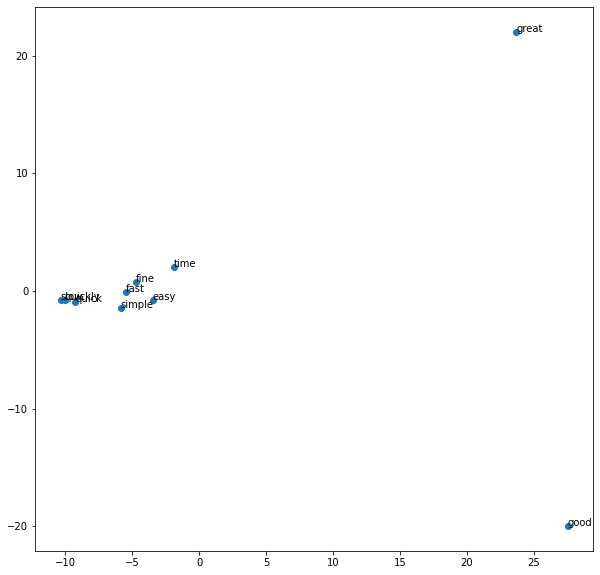

In [16]:
# adjective
top_10('quick')

Top 10 closest word for the word hunt are:
['hunt', 'spin', 'rotate', 'compensate', 'struggle', 'fly', 'decline', 'interfere', 'bend', 'synchronize']


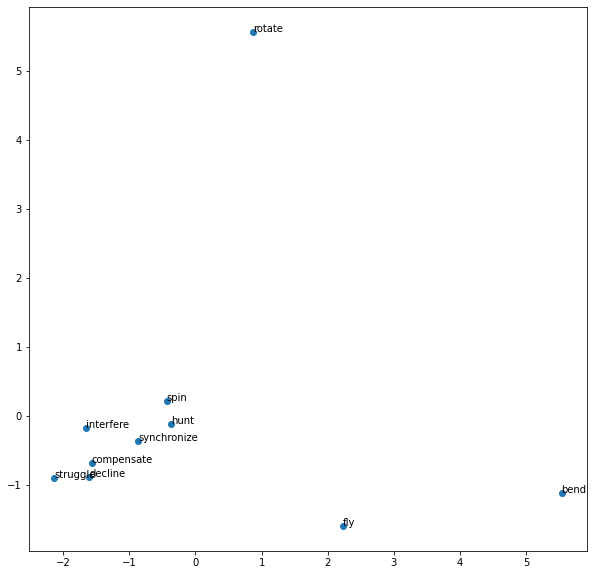

In [17]:
# verb
top_10('hunt')